# Dorian Tutorial

In [1]:
import numpy as np
from scipy.stats import binned_statistic
import healpy as hp
from dorian import raytrace
from dorian.power_spectrum import C_ell
import matplotlib.pyplot as plt
import h5py
import os
nthreads=40
os.environ["OMP_NUM_THREADS"] = str(nthreads)

### Perform the ray-tracing

In [ ]:
raytrace(
    simDir='/ptmp/mpa/fferlito/mass_shell_merged/DM-Gadget4/MTNG-L2040-10240-deltaf-100meV-A-nside1024-thick100',
    outDir="./",
    z_s=1.0,
    interp='nufft',
    save_ray_positions=False,
    nthreads=nthreads,
)

### Read convergence map

In [2]:
with h5py.File("raytracing_z1.0_thick100_nufft.hdf5", "r") as f:
    A = np.array(f["Distortion_matrix"]["Raytraced"])
    #kappa_born = np.array(f["Distortion_matrix"]["Kappa_born"])
kappa = -(A[0][0] + A[1][1]) / 2 + 1
omega_ray = (A[0][1] - A[1][0]) / 2

### Visualize the map

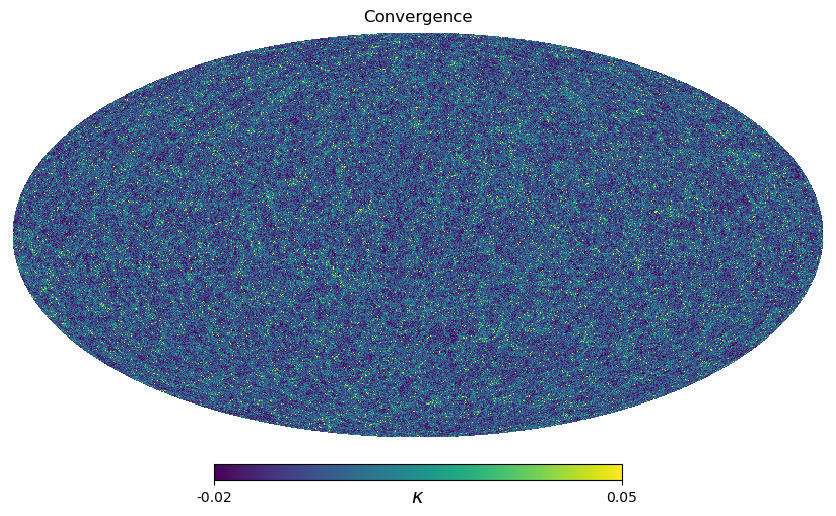

In [3]:
hp.mollview(kappa,min=-0.02,max=0.05,title="Convergence",unit="$\kappa$")

### Compute angular power spectrum

In [4]:
l, cl = C_ell(kappa)

3072 3072


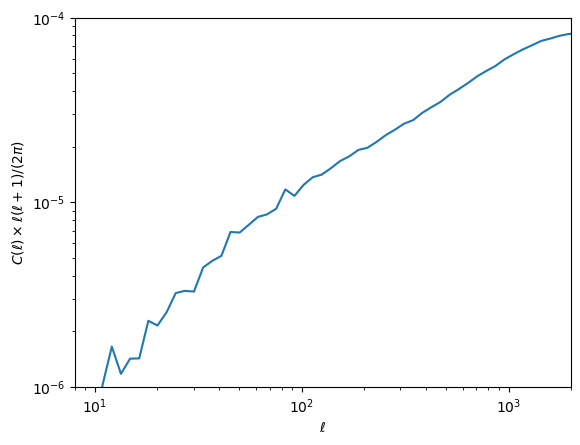

In [6]:
bins = np.logspace(np.log10(l[1]), np.log10(l[-1]), num=80)
print(len(l), len(cl))
cll = [cl[j]*l[j]*(l[j]+1) / (2*np.pi) for j in range(len(cl))]
y, x, _ = binned_statistic(l, [cl[j]*l[j]*(l[j]+1) / (2*np.pi) for j in range(len(cl))], bins=bins)
x = [np.mean([x[j], x[j + 1]]) for j in range(len(x) - 1)]

fig = plt.figure()
ax = fig.add_subplot(111, ylabel=r"$C(\ell) \times \ell(\ell+1)/(2 \pi)$", xlabel="$\ell$")
ax.set_xlim([8,2e3]); ax.set_ylim([1e-6,1e-4])
ax.set_xscale('log'); ax.set_yscale('log') 
ax.plot(x,y)
plt.show()